Iniciamos cargando las librerias iniciales para el procesado

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Cargamos y verificamos el estado de las variables con un tipo de Int32

In [2]:
df = pd.read_csv("./ModelData.csv")
df = df.astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394489 entries, 0 to 394488
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   stcc                  394489 non-null  int32
 1   netWeight             394489 non-null  int32
 2   carLength             394489 non-null  int32
 3   Dia_semana            394489 non-null  int32
 4   estacionOrigen_id     394489 non-null  int32
 5   estacionDestino_id    394489 non-null  int32
 6   consignatario_id      394489 non-null  int32
 7   tipoServicio_id       394489 non-null  int32
 8   idTrenICHR_id         394489 non-null  int32
 9   idFerrocarrilICHR_id  394489 non-null  int32
 10  tipoCarro_id          394489 non-null  int32
 11  año                   394489 non-null  int32
 12  mes                   394489 non-null  int32
 13  dia                   394489 non-null  int32
 14  coches_por_dia        394489 non-null  int32
 15  hora_minuto           394489 non-n

Hacemos una matriz de correlacion para encontrar que variables tienen mas impacto para encontrar cuantos coches por dia llegan

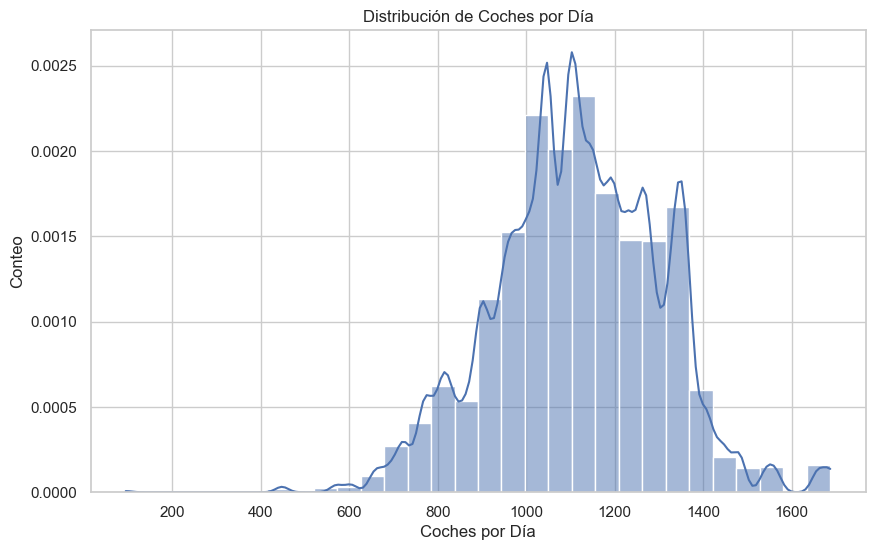

In [10]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Histogram of 'coches_por_dia'
plt.figure(figsize=(10, 6))
sns.histplot(df['coches_por_dia'], bins=30, kde=True, stat='density')
plt.title('Distribución de Coches por Día')
plt.xlabel('Coches por Día')
plt.ylabel('Conteo')
plt.show()


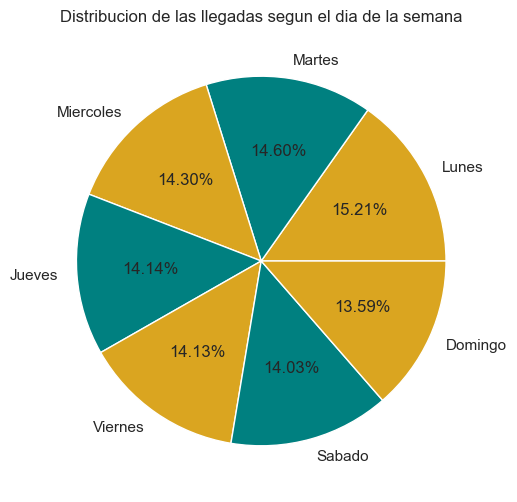

In [4]:
plt.figure(figsize=(10,6))
plt.pie(df['Dia_semana'].value_counts(), labels=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'], autopct='%1.2f%%', colors=['goldenrod', 'teal'])
plt.title('Distribucion de las llegadas segun el dia de la semana')
plt.show()

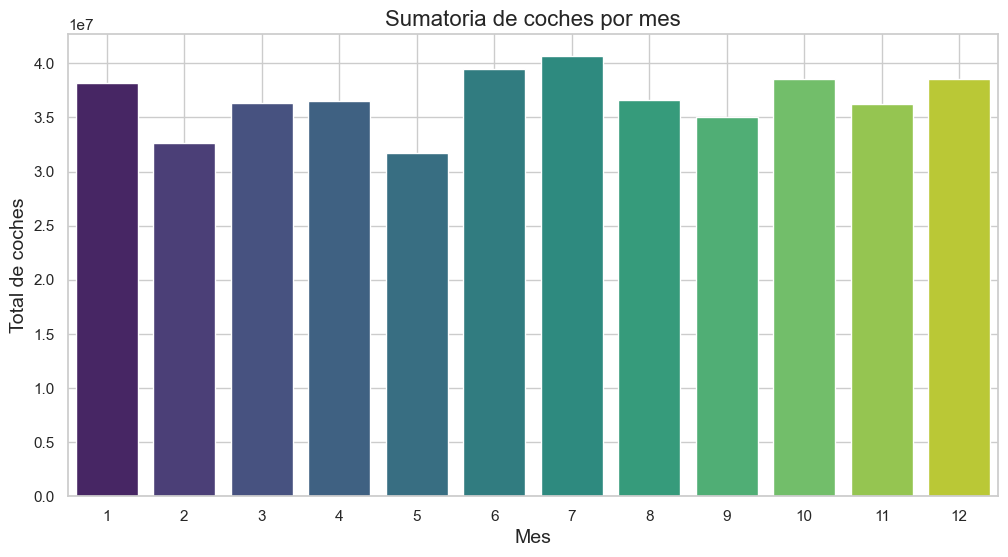

In [47]:
# Crear un DataFrame con la sumatoria de coches por mes
sum_coches_mes = df.groupby('mes')['coches_por_dia'].sum().reset_index()

# Renombrar las columnas para mayor claridad
sum_coches_mes.columns = ['Mes', 'Total_Coches']

# Graficar la sumatoria de coches por mes
plt.figure(figsize=(12, 6))
sns.barplot(data=sum_coches_mes, x='Mes', y='Total_Coches', palette='viridis')
plt.title('Sumatoria de coches por mes', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Total de coches', fontsize=14)
plt.grid(True)
plt.show()
